# Intro-base2
- 数据库存储盒读取
- R基本绘图
- R编程

# 1.数据库存储和读取
命令getwd()获得工作目录，setwd()设置工作目录。

R命令中目录的分隔符使用正斜杠“/”或两个反斜杠“\”。

## 数据的存储

使用函数write.table()或save()在文件中写入一个对象。下面以数据框为例

In [2]:
d = data.frame(obs = c(1, 2, 3), treat = c("A", "B", "A" ), 
              weight = c(2.3, NA, 9))
d

obs,treat,weight
<dbl>,<chr>,<dbl>
1,A,2.3
2,B,NA
3,A,9.0


In [6]:
# 保存为简单的文本文件
write.table(d, file = "./foo.txt",
           row.names = F, quote = F) 
# row.names = F指定行名不写入文件，quote = F表示变量名不含有双引号

In [7]:
# 保存为逗号分割的文本文件
write.csv(d, file = "./foo.csv",
         row.names = F, quote = F)

In [9]:
# 保存为R格式文件
save(d, file = "./foo.Rdata")

In [10]:
# 在经过一段时间的分析后，常需要将工作空间的映像保存，命令为：
save.image()
# 它等价于 save(list = ls(all=TRUE), file = ".RData")

## 数据的读取
可以使用read.table()、scan()、readfwf()函数读入存储在文本文件中的数据。

In [12]:
# read.table 读入数据并创建一个数据框
a = read.table("./foo.txt", header=TRUE) # header = TRUE 表明读入的第一行是变量名
a

obs,treat,weight
<int>,<chr>,<dbl>
1,A,2.3
2,B,NA
3,A,9.0


In [14]:
# 使用函数scan()，它比read.table()更加灵活，唯一的区别是scan()可以指定变量的类型

In [15]:
mydata = scan("foo.csv", what = list(obs=0, treat="", weight=0), sep = ",", skip = 1)
mydata

$obs
[1] 1 2 3

$treat
[1] "A" "B" "A"

$weight
[1] 2.3  NA 9.0

In [17]:
# 另一个重要区别是scan()函数可以创建不同的对象，
# 在缺省情况下（what被省略），将创建一个数值型向量。


In [19]:
# 使用函数read.fwf()，它可以用来读取文件中一些固定宽度格式的数据。
file.exists("data.txt")

[1] FALSE

In [25]:
mydata = read.fwf("foo.txt", widths=c(3,2),col.names=c("obs","t"))
mydata

obs,t
<chr>,<chr>
obs,t
1 A,2
2 B,N
3 A,9


## Excel数据的读取
两种读取方式
- 剪切板
- 使用程序包RODBC



第一种是打开excel电子表格，选择需要的数据区域，复制到剪贴板，然后在R中键入命令

mydata = read.delim("clipboard")


In [27]:
# 第二种是使用程序包RODBC
# 比如得到foo.xls（我已创建在当前目录下）种的工作表1种的数据
# install.packages("RODBC", repos=" https://cran.rstudio.com/")
install.packages("RODBC",repos="https://mirrors.tuna.tsinghua.edu.cn/CRAN/")

package 'RODBC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\zyy\AppData\Local\Temp\RtmpoJiXPO\downloaded_packages


In [29]:
library(RODBC)
z = odbcConnectExcel("foo.xls")

ERROR: Error in odbcConnectExcel("foo.xls"): odbcConnectExcel is only usable with 32-bit Windows


这没办法了，我的64位系统用不了。所以建议大家做数据分析时尽量不要保存为电子表格文件，常保存为.csv或.tsv等分隔符文件。

## R中数据集的读取
R的标准数据datasets

R提供了一个基本的数据集包，包含了数百个数据集（一般为数据框或列表）。它们随着R的启动全部一次性自动载入，通过data()命令可以列出这些数据集。使用help函数可以查看相关信息

In [33]:
data()

Package,Item,Title
<chr>,<chr>,<chr>
datasets,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
datasets,BJsales,Sales Data with Leading Indicator
datasets,BJsales.lead (BJsales),Sales Data with Leading Indicator
datasets,BOD,Biochemical Oxygen Demand
datasets,CO2,Carbon Dioxide Uptake in Grass Plants
datasets,ChickWeight,Weight versus age of chicks on different diets
datasets,DNase,Elisa assay of DNase
datasets,EuStockMarkets,"Daily Closing Prices of Major European Stock Indices, 1991-1998"
datasets,Formaldehyde,Determination of Formaldehyde



专用程序包中的数据集

data(package="pkname")可以列出pkname包中所有的数据集。

可以看出data()有两个功能：浏览数据列表和加载数据集。可以浏览的不一定已经加载。


## R格式的数据
R的数据或更为一般的对象可以通过save()保存起来，文件名以Rdata为后缀。

In [35]:
attach(mtcars)
mtcars2 = data.frame(mtcars[, c(1,4)])

The following objects are masked from mtcars (pos = 3):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt




In [37]:
head(mtcars2)

,mpg,hp
,<dbl>,<dbl>
Mazda RX4,21.0,110
Mazda RX4 Wag,21.0,110
Datsun 710,22.8,93
Hornet 4 Drive,21.4,110
Hornet Sportabout,18.7,175
Valiant,18.1,105


In [39]:
save(mtcars2, "./mycardata.Rdata") 
# jupyter notebook好像不支持保存？所以有兴趣可以测试测试，想要成功运行还请在R或Rstudio

ERROR: Error in save(mtcars2, "./mycardata.Rdata"): object './mycardata.Rdata' not found


In [42]:
# 载入数据
# 如果保存了.Rdata数据，可以使用load()函数将其载入还原
# load("./mydata.Rdata")

# 2.R基本绘图



	demo(graphics)
	---- ~~~~~~~~

> #  Copyright (C) 1997-2009 The R Core Team
> 
> require(datasets)

> require(grDevices); require(graphics)

> ## Here is some code which illustrates some of the differences between
> ## R and S graphics capabilities.  Note that colors are generally specified
> ## by a character string name (taken from the X11 rgb.txt file) and that line
> ## textures are given similarly.  The parameter "bg" sets the background
> ## parameter for the plot and there is also an "fg" parameter which sets
> ## the foreground color.
> 
> 
> x <- stats::rnorm(50)

> opar <- par(bg = "white")

> plot(x, ann = FALSE, type = "n")

> abline(h = 0, col = gray(.90))

> lines(x, col = "green4", lty = "dotted")

> points(x, bg = "limegreen", pch = 21)

> title(main = "Simple Use of Color In a Plot",
+       xlab = "Just a Whisper of a Label",
+       col.main = "blue", col.lab = gray(.8),
+       cex.main = 1.2, cex.lab = 1.0, font.main = 4, font.lab = 3)

> ## A little color wheel

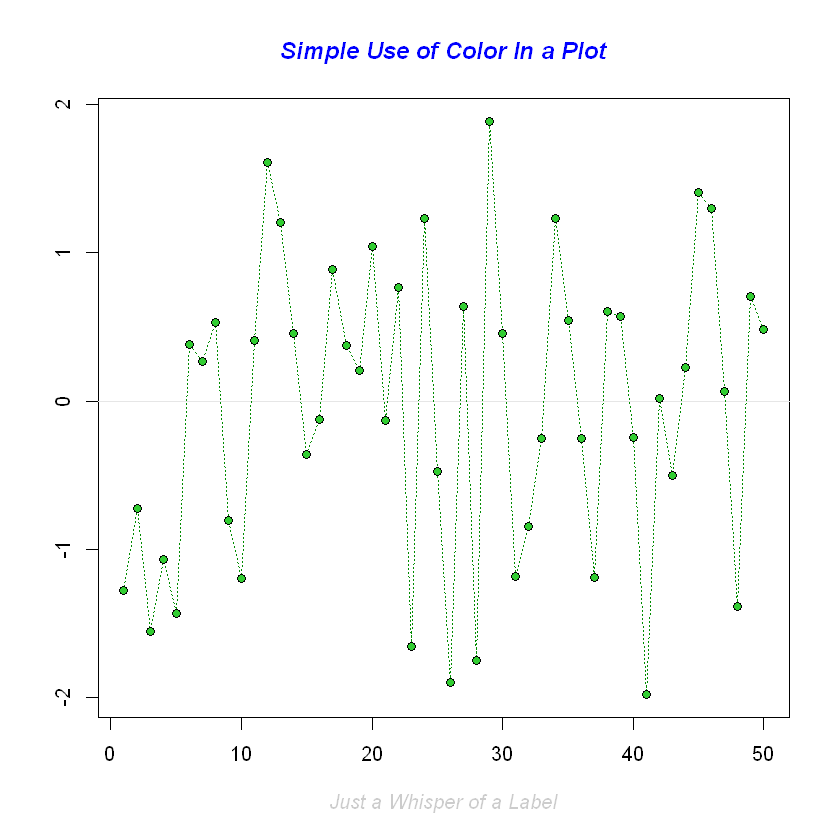


> title(main = "A Sample Color Wheel", cex.main = 1.4, font.main = 3)

> title(xlab = "(Use this as a test of monitor linearity)",
+       cex.lab = 0.8, font.lab = 3)

> ## We have already confessed to having these.  This is just showing off X11
> ## color names (and the example (from the postscript manual) is pretty "cute".
> 
> pie.sales <- c(0.12, 0.3, 0.26, 0.16, 0.04, 0.12)

> names(pie.sales) <- c("Blueberry", "Cherry",
+ 		      "Apple", "Boston Cream", "Other", "Vanilla Cream")

> pie(pie.sales,
+     col = c("purple","violetred1","green3","cornsilk","cyan","white"))


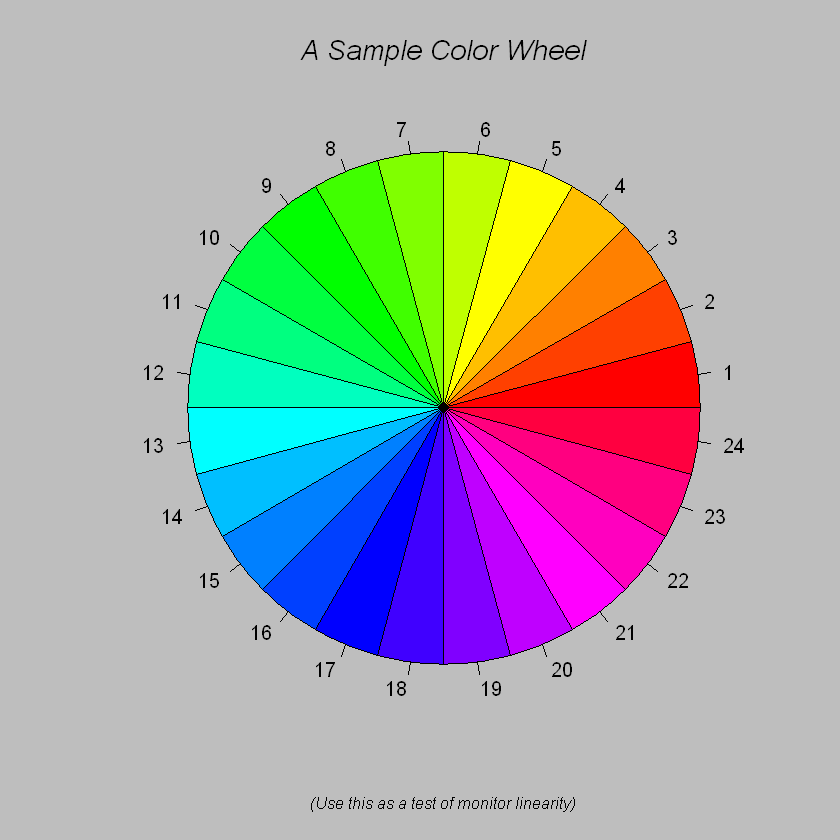


> title(main = "January Pie Sales", cex.main = 1.8, font.main = 1)

> title(xlab = "(Don't try this at home kids)", cex.lab = 0.8, font.lab = 3)

> ## Boxplots:  I couldn't resist the capability for filling the "box".
> ## The use of color seems like a useful addition, it focuses attention
> ## on the central bulk of the data.
> 
> par(bg="cornsilk")

> n <- 10

> g <- gl(n, 100, n*100)

> x <- rnorm(n*100) + sqrt(as.numeric(g))

> boxplot(split(x,g), col="lavender", notch=TRUE)


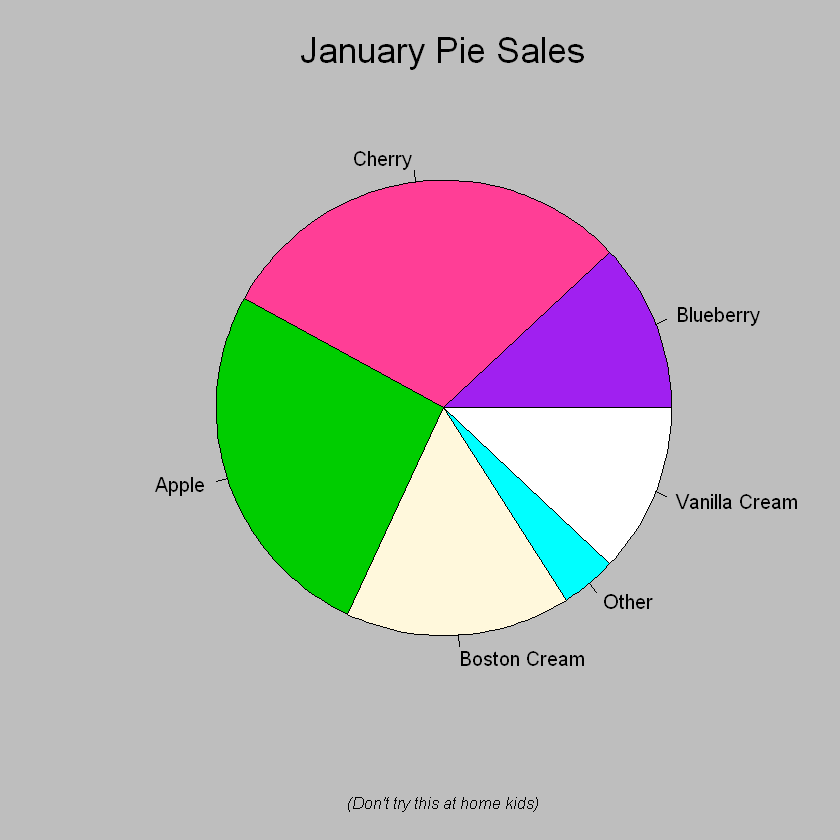


> title(main="Notched Boxplots", xlab="Group", font.main=4, font.lab=1)

> ## An example showing how to fill between curves.
> 
> par(bg="white")

> n <- 100

> x <- c(0,cumsum(rnorm(n)))

> y <- c(0,cumsum(rnorm(n)))

> xx <- c(0:n, n:0)

> yy <- c(x, rev(y))

> plot(xx, yy, type="n", xlab="Time", ylab="Distance")


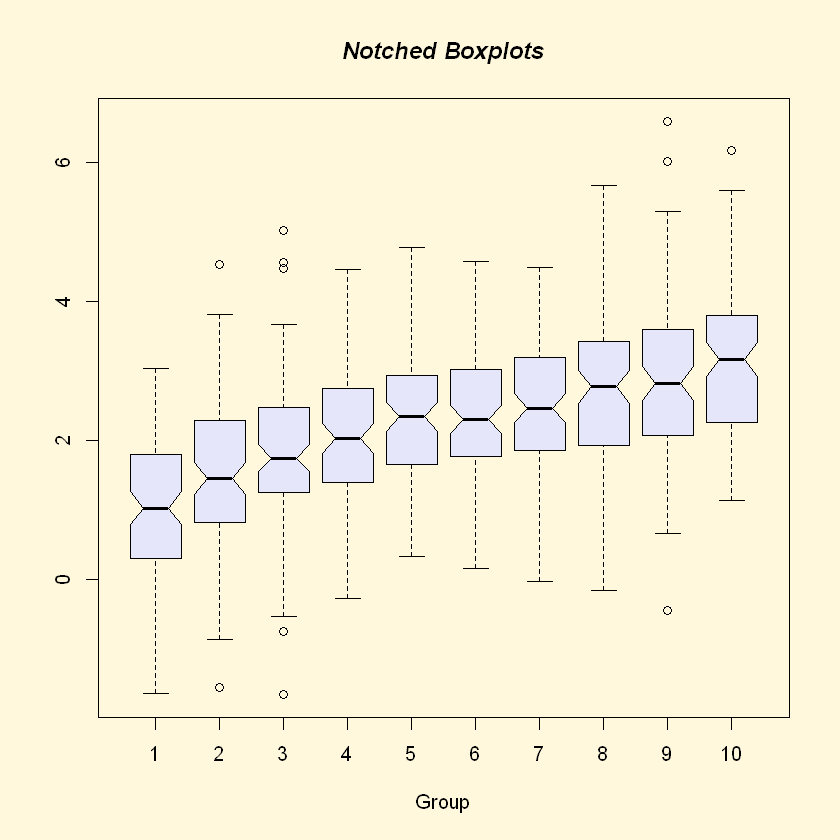


> polygon(xx, yy, col="gray")

> title("Distance Between Brownian Motions")

> ## Colored plot margins, axis labels and titles.	 You do need to be
> ## careful with these kinds of effects.	It's easy to go completely
> ## over the top and you can end up with your lunch all over the keyboard.
> ## On the other hand, my market research clients love it.
> 
> x <- c(0.00, 0.40, 0.86, 0.85, 0.69, 0.48, 0.54, 1.09, 1.11, 1.73, 2.05, 2.02)

> par(bg="lightgray")

> plot(x, type="n", axes=FALSE, ann=FALSE)


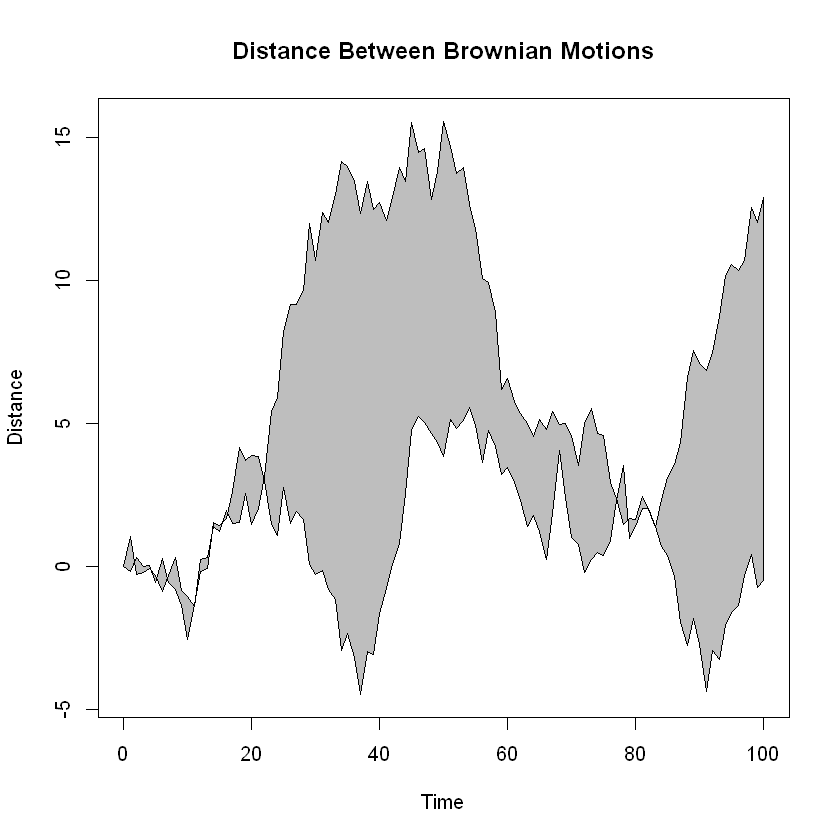


> usr <- par("usr")

> rect(usr[1], usr[3], usr[2], usr[4], col="cornsilk", border="black")

> lines(x, col="blue")

> points(x, pch=21, bg="lightcyan", cex=1.25)

> axis(2, col.axis="blue", las=1)

> axis(1, at=1:12, lab=month.abb, col.axis="blue")

> box()

> title(main= "The Level of Interest in R", font.main=4, col.main="red")

> title(xlab= "1996", col.lab="red")

> ## A filled histogram, showing how to change the font used for the
> ## main title without changing the other annotation.
> 
> par(bg="cornsilk")

> x <- rnorm(1000)

> hist(x, xlim=range(-4, 4, x), col="lavender", main="")


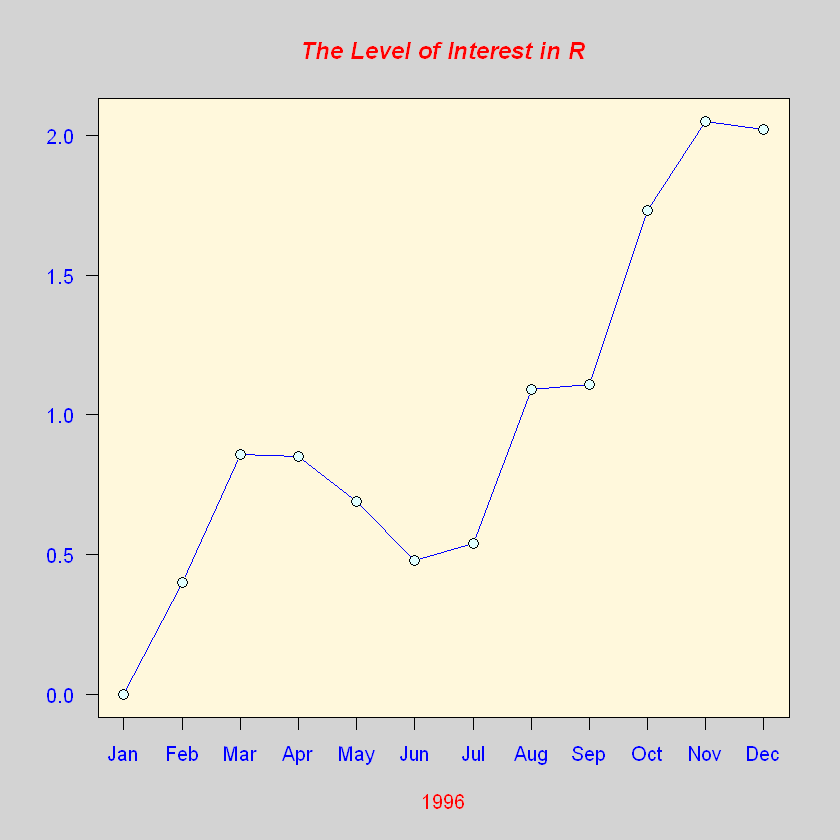


> title(main="1000 Normal Random Variates", font.main=3)

> ## A scatterplot matrix
> ## The good old Iris data (yet again)
> 
> pairs(iris[1:4], main="Edgar Anderson's Iris Data", font.main=4, pch=19)


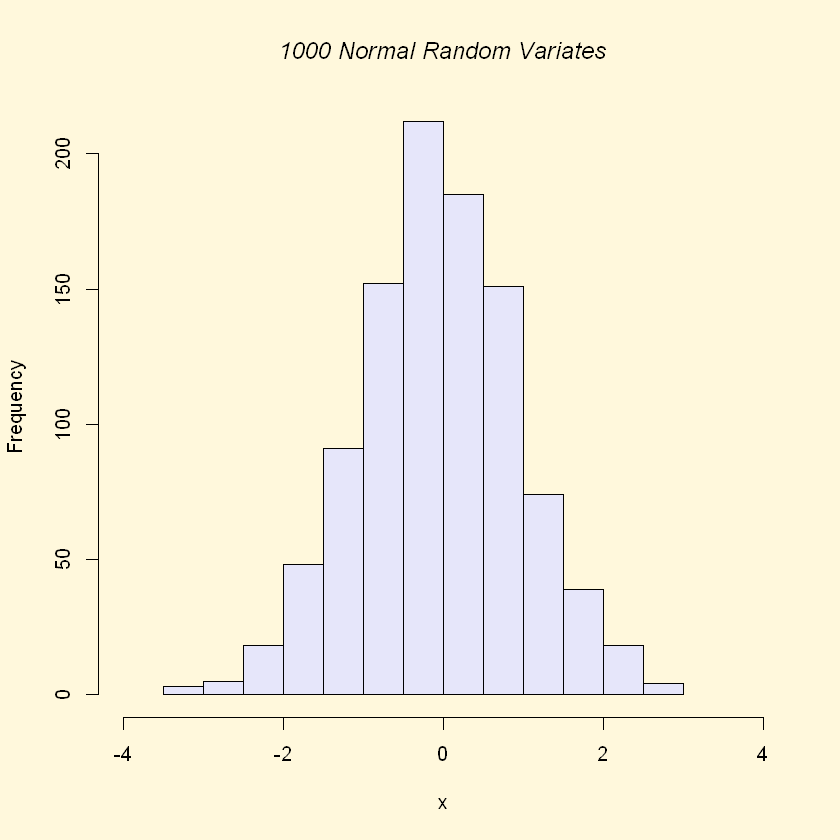


> pairs(iris[1:4], main="Edgar Anderson's Iris Data", pch=21,
+       bg = c("red", "green3", "blue")[unclass(iris$Species)])


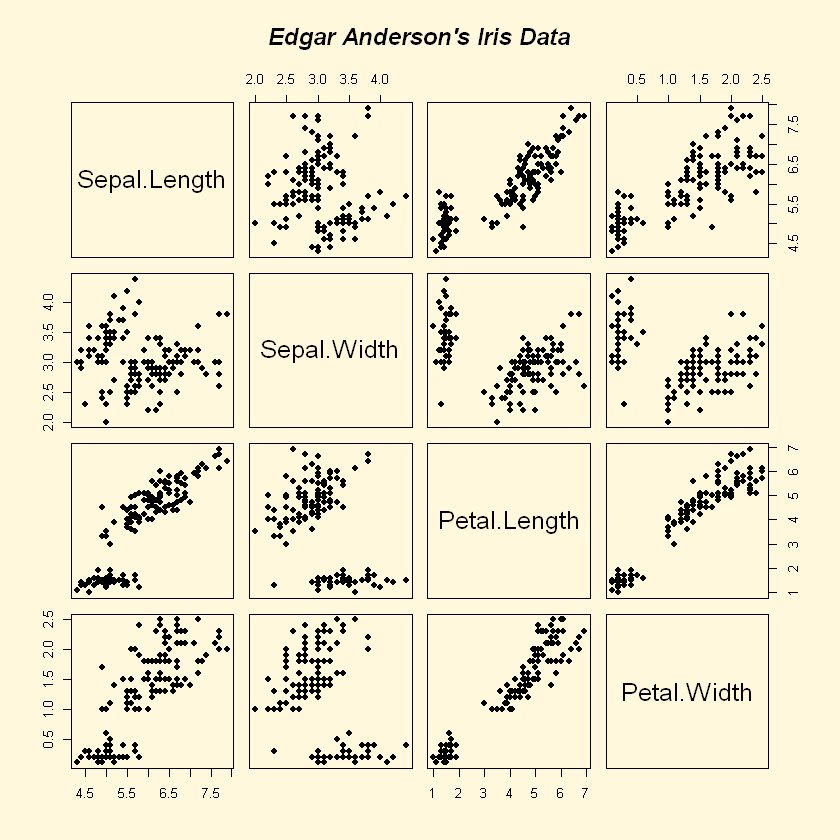


> ## Contour plotting
> ## This produces a topographic map of one of Auckland's many volcanic "peaks".
> 
> x <- 10*1:nrow(volcano)

> y <- 10*1:ncol(volcano)

> lev <- pretty(range(volcano), 10)

> par(bg = "lightcyan")

> pin <- par("pin")

> xdelta <- diff(range(x))

> ydelta <- diff(range(y))

> xscale <- pin[1]/xdelta

> yscale <- pin[2]/ydelta

> scale <- min(xscale, yscale)

> xadd <- 0.5*(pin[1]/scale - xdelta)

> yadd <- 0.5*(pin[2]/scale - ydelta)

> plot(numeric(0), numeric(0),
+      xlim = range(x)+c(-1,1)*xadd, ylim = range(y)+c(-1,1)*yadd,
+      type = "n", ann = FALSE)


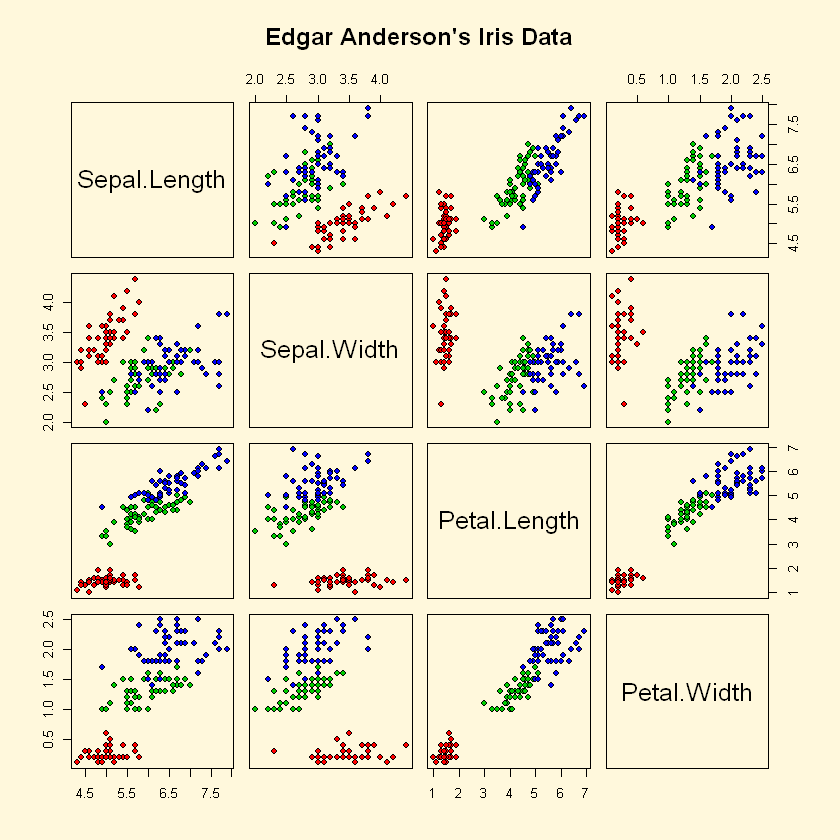


> usr <- par("usr")

> rect(usr[1], usr[3], usr[2], usr[4], col="green3")

> contour(x, y, volcano, levels = lev, col="yellow", lty="solid", add=TRUE)

> box()

> title("A Topographic Map of Maunga Whau", font= 4)

> title(xlab = "Meters North", ylab = "Meters West", font= 3)

> mtext("10 Meter Contour Spacing", side=3, line=0.35, outer=FALSE,
+       at = mean(par("usr")[1:2]), cex=0.7, font=3)

> ## Conditioning plots
> 
> par(bg="cornsilk")

> coplot(lat ~ long | depth, data = quakes, pch = 21, bg = "green3")


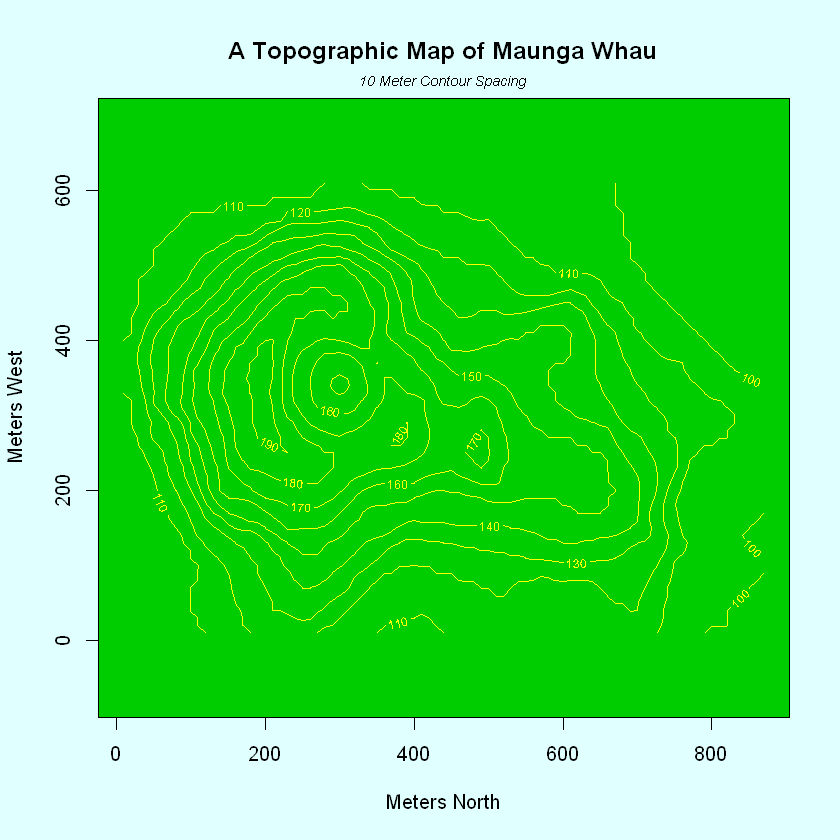


> par(opar)


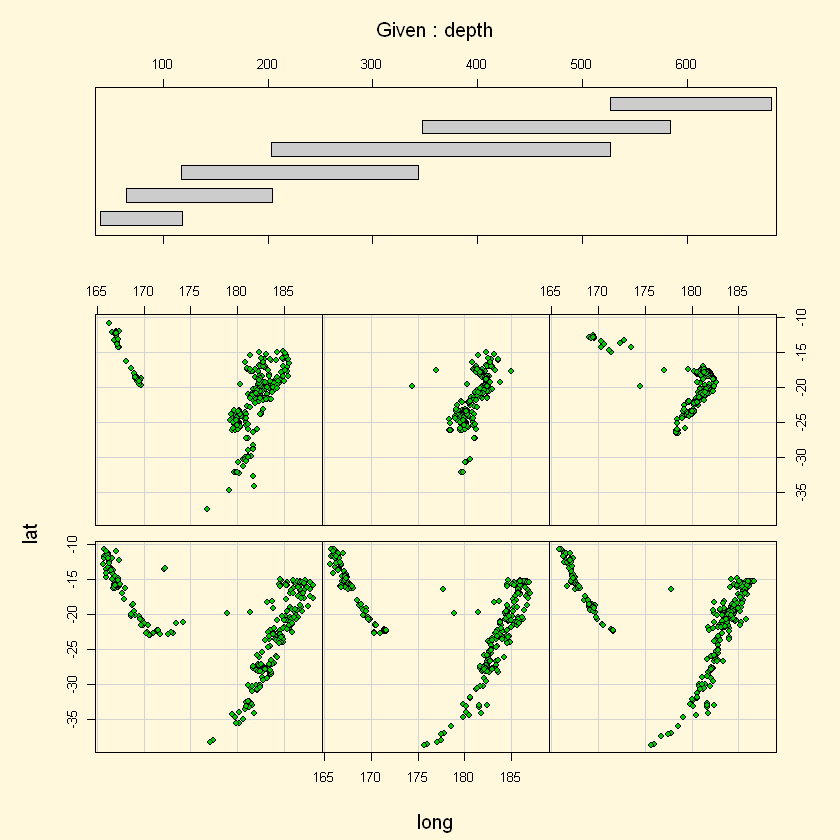

In [45]:
# 二维图形示例
demo(graphics)



	demo(persp)
	---- ~~~~~

> ### Demos for  persp()  plots   -- things not in  example(persp)
> ### -------------------------
> 
> require(datasets)

> require(grDevices); require(graphics)

> ## (1) The Obligatory Mathematical surface.
> ##     Rotated sinc function.
> 
> x <- seq(-10, 10, length.out = 50)

> y <- x

> rotsinc <- function(x,y)
+ {
+     sinc <- function(x) { y <- sin(x)/x ; y[is.na(y)] <- 1; y }
+     10 * sinc( sqrt(x^2+y^2) )
+ }

> sinc.exp <- expression(z == Sinc(sqrt(x^2 + y^2)))

> z <- outer(x, y, rotsinc)

> oldpar <- par(bg = "white")

> persp(x, y, z, theta = 30, phi = 30, expand = 0.5, col = "lightblue")

> title(sub=".")## work around persp+plotmath bug

> title(main = sinc.exp)

> persp(x, y, z, theta = 30, phi = 30, expand = 0.5, col = "lightblue",
+       ltheta = 120, shade = 0.75, ticktype = "detailed",
+       xlab = "X", ylab = "Y", zlab = "Z")


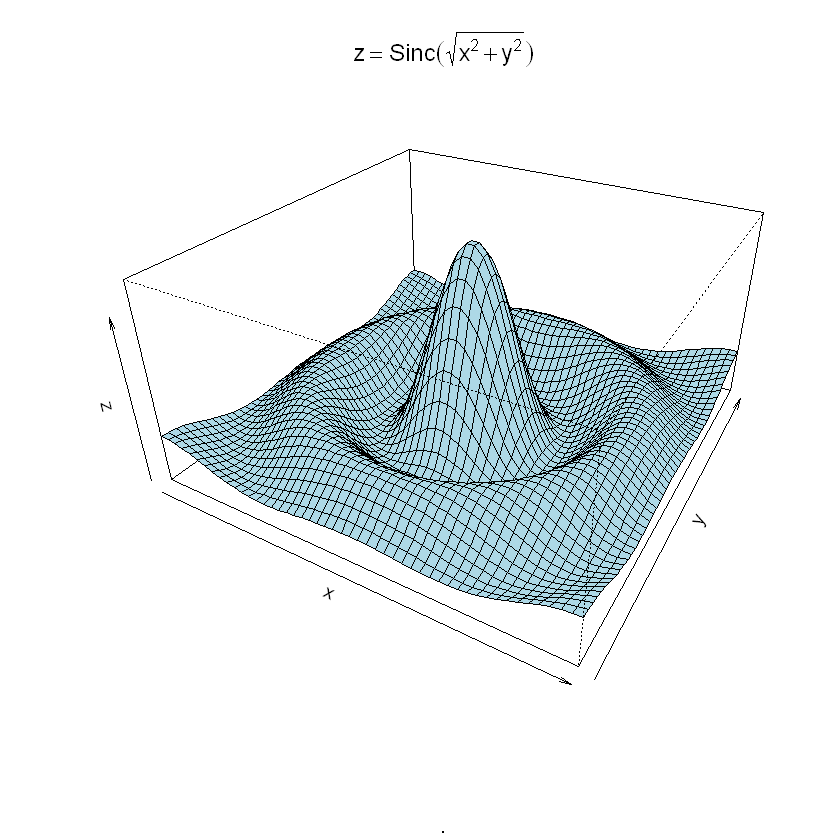


> title(sub=".")## work around persp+plotmath bug

> title(main = sinc.exp)

> ## (2) Visualizing a simple DEM model
> 
> z <- 2 * volcano        # Exaggerate the relief

> x <- 10 * (1:nrow(z))   # 10 meter spacing (S to N)

> y <- 10 * (1:ncol(z))   # 10 meter spacing (E to W)

> persp(x, y, z, theta = 120, phi = 15, scale = FALSE, axes = FALSE)


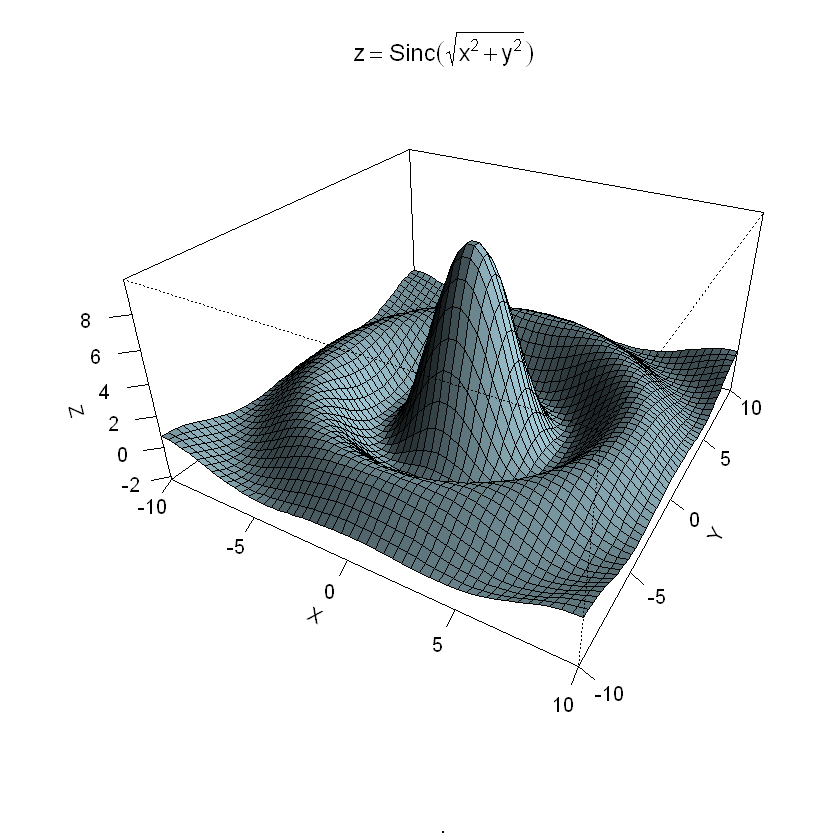


> ## (3) Now something more complex
> ##     We border the surface, to make it more "slice like"
> ##     and color the top and sides of the surface differently.
> 
> z0 <- min(z) - 20

> z <- rbind(z0, cbind(z0, z, z0), z0)

> x <- c(min(x) - 1e-10, x, max(x) + 1e-10)

> y <- c(min(y) - 1e-10, y, max(y) + 1e-10)

> fill <- matrix("green3", nrow = nrow(z)-1, ncol = ncol(z)-1)

> fill[ , i2 <- c(1,ncol(fill))] <- "gray"

> fill[i1 <- c(1,nrow(fill)) , ] <- "gray"

> par(bg = "lightblue")

> persp(x, y, z, theta = 120, phi = 15, col = fill, scale = FALSE, axes = FALSE)


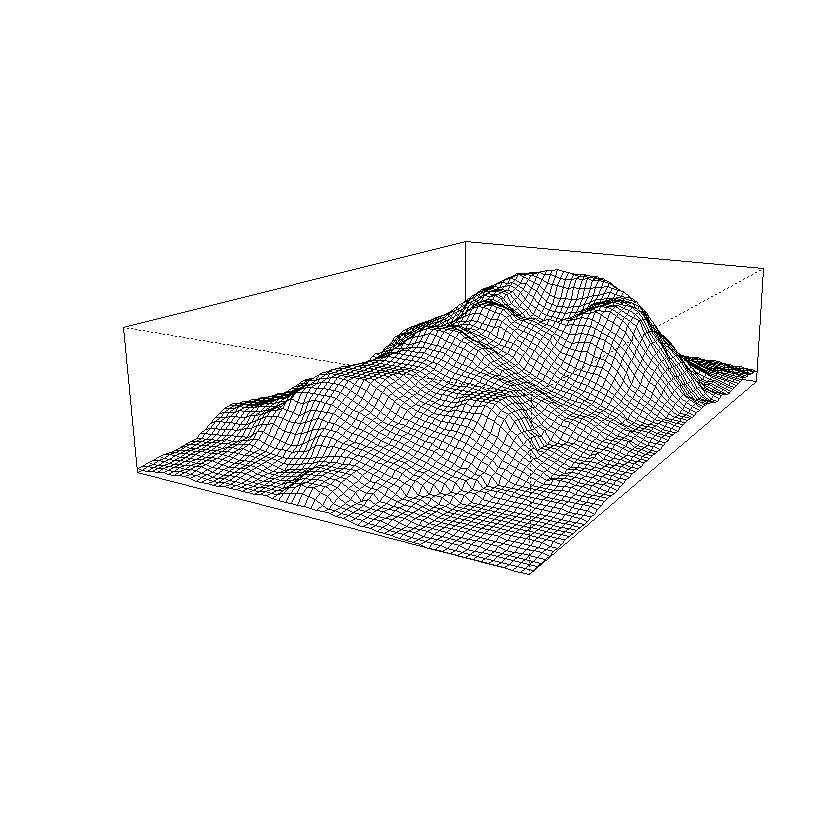


> title(main = "Maunga Whau\nOne of 50 Volcanoes in the Auckland Region.",
+       font.main = 4)

> par(bg = "slategray")

> persp(x, y, z, theta = 135, phi = 30, col = fill, scale = FALSE,
+       ltheta = -120, lphi = 15, shade = 0.65, axes = FALSE)


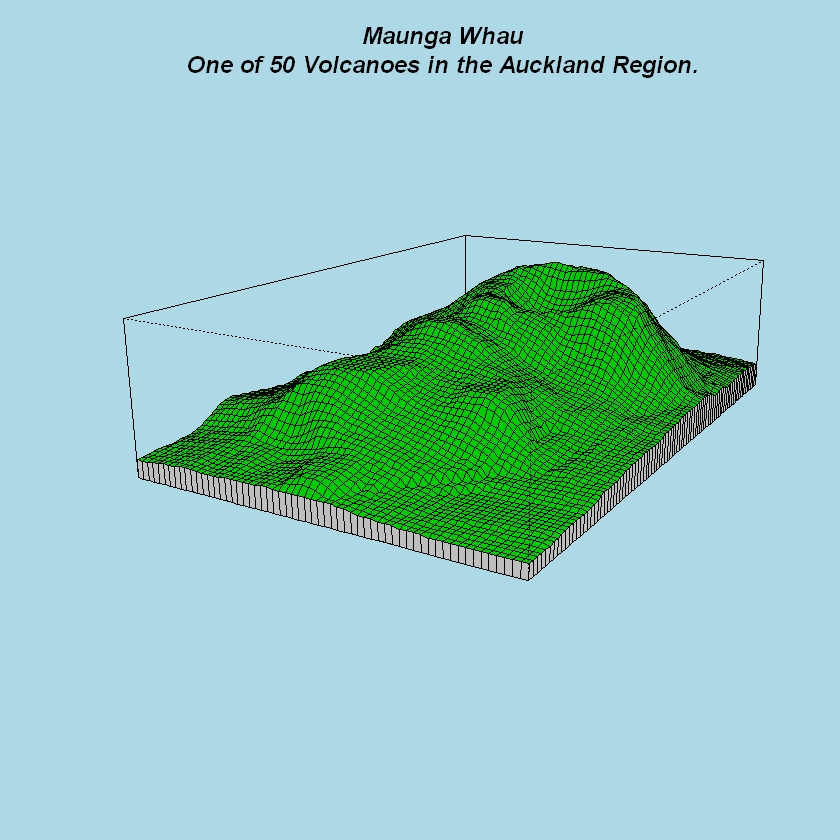


> ## Don't draw the grid lines :  border = NA
> persp(x, y, z, theta = 135, phi = 30, col = "green3", scale = FALSE,
+       ltheta = -120, shade = 0.75, border = NA, box = FALSE)


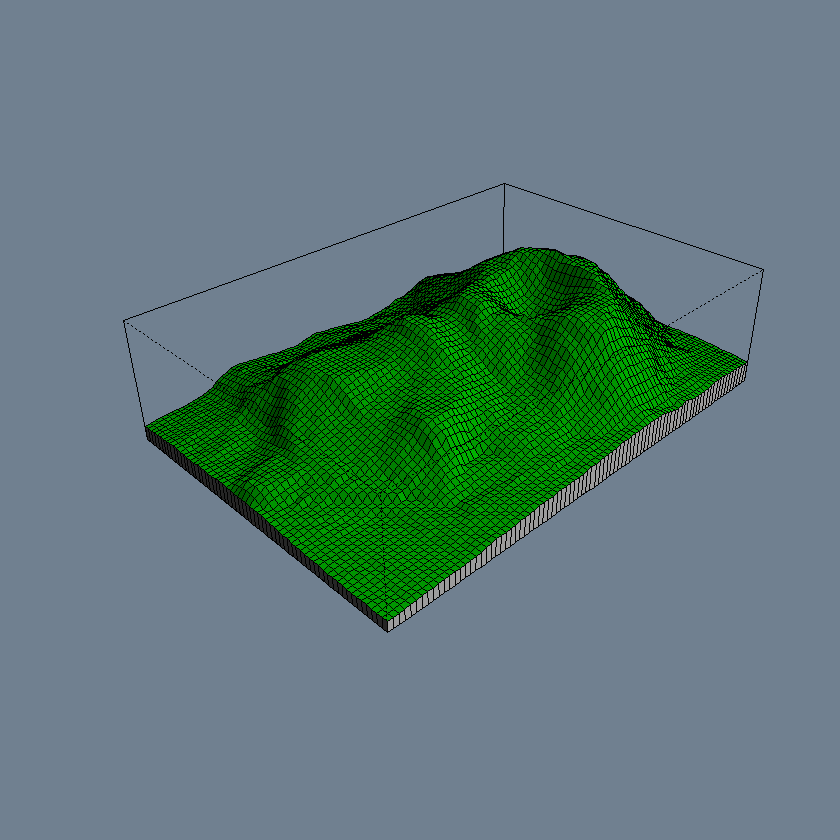


> ## `color gradient in the soil' :
> fcol <- fill ; fcol[] <- terrain.colors(nrow(fcol))

> persp(x, y, z, theta = 135, phi = 30, col = fcol, scale = FALSE,
+       ltheta = -120, shade = 0.3, border = NA, box = FALSE)


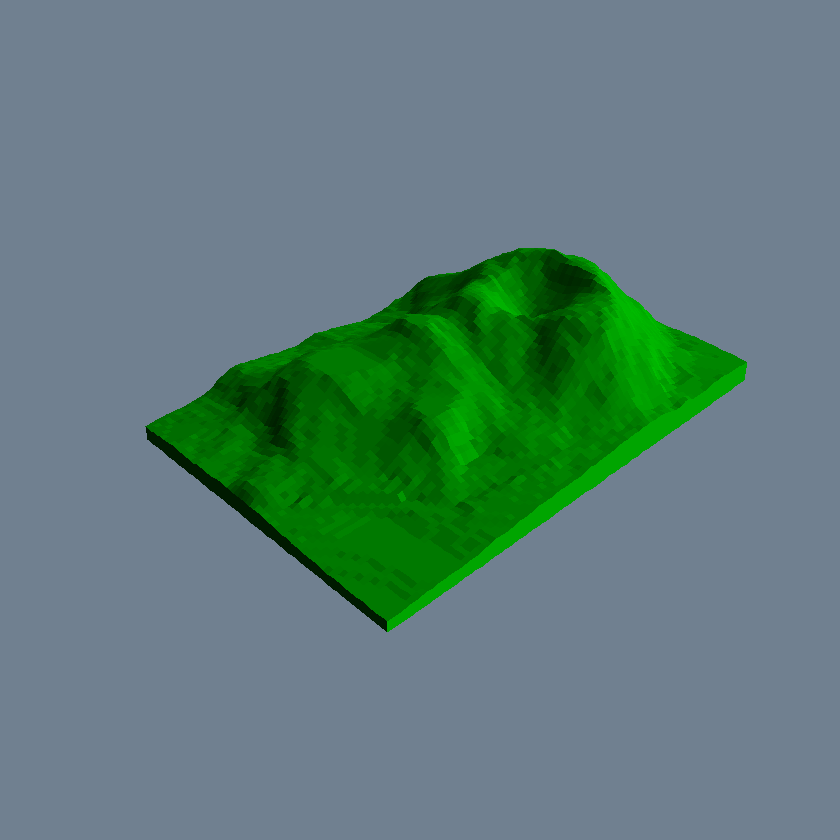


> ## `image like' colors on top :
> fcol <- fill

> zi <- volcano[ -1,-1] + volcano[ -1,-61] +
+            volcano[-87,-1] + volcano[-87,-61]  ## / 4

> fcol[-i1,-i2] <-
+     terrain.colors(20)[cut(zi,
+                            stats::quantile(zi, seq(0,1, length.out = 21)),
+                            include.lowest = TRUE)]

> persp(x, y, 2*z, theta = 110, phi = 40, col = fcol, scale = FALSE,
+       ltheta = -120, shade = 0.4, border = NA, box = FALSE)


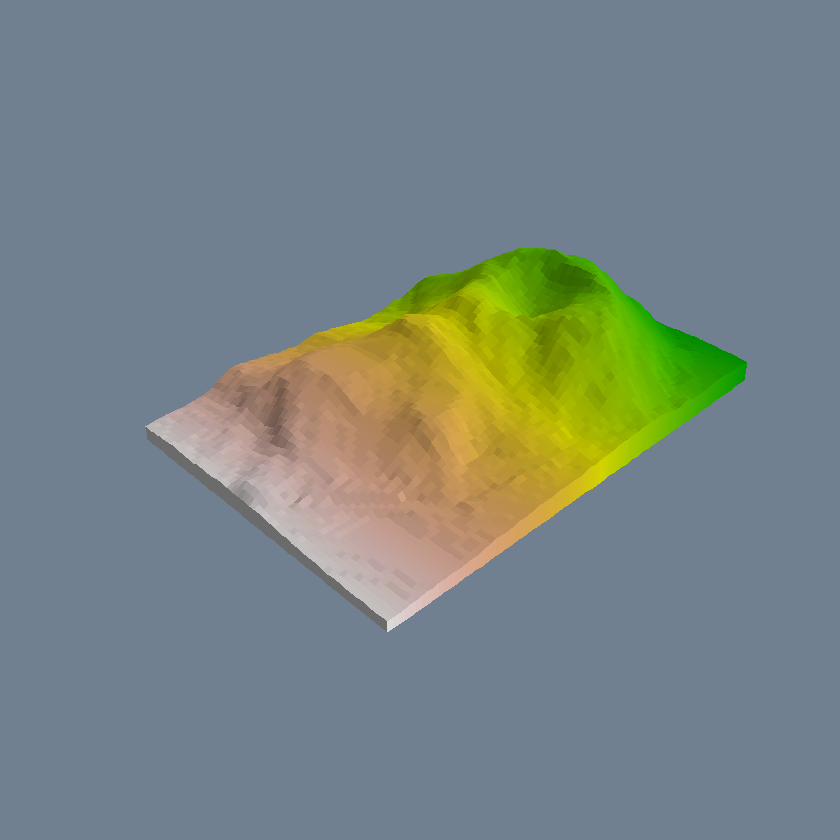


> ## reset par():
> par(oldpar)


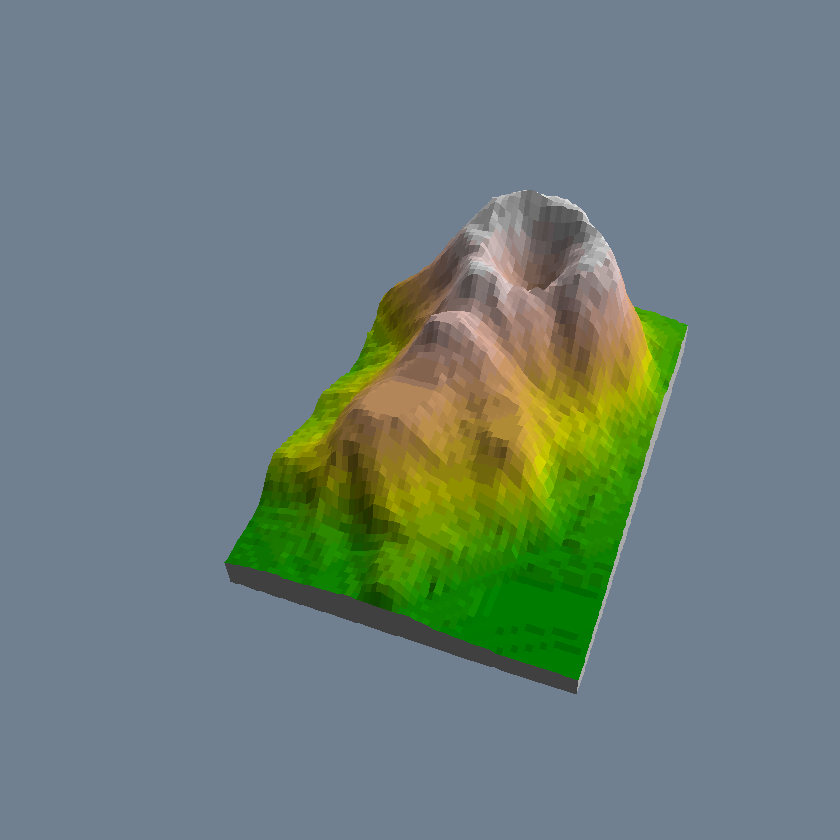

In [46]:
# 三维图形示例
demo(persp)



绘图函数的工作方式与本文前面描述的工作方式大为不同，不能把绘图函数的结果赋给一个对象，其结果将直接输出到一个“绘图设备”上。绘图设备是一个绘图的窗口或时一个文件。

R有两种绘图函数：

    高级绘图函数： 创建一个新的图形
    低级绘图函数： 在现存的图形上添加元素

另外绘图参数提供了丰富的绘图选项，可以使用缺省值或者用函数par()修改。更高级的图形使用grid和lattice绘图包实现，而近几年ggplot包是绘图一大热点。

绘图函数众多，我不一一列出了，靠死记是掌握不了技能的，一些基本图形不会可以百度谷歌找资料，像https://www.harding.edu/fmccown/r/ 就展示了一些简单图形的画法。我们接下来也以实际操作，使用的命令为常用命令。


以内嵌数据Puromycin为例来说明R中基本的绘图方法

In [48]:
dim(Puromycin)

[1] 23  3

In [49]:
head(Puromycin)

,conc,rate,state
,<dbl>,<dbl>,<fct>
1,0.02,76,treated
2,0.02,47,treated
3,0.06,97,treated
4,0.06,107,treated
5,0.11,123,treated
6,0.11,139,treated


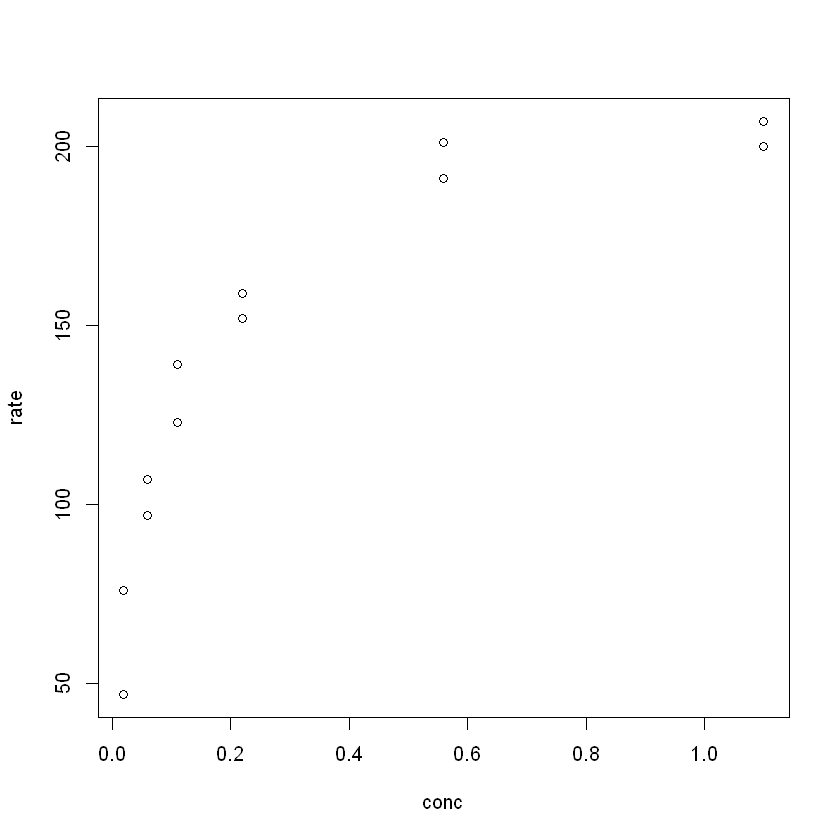

In [51]:
# 简单散点图
# 对于状态treated，画出rate关于cone的散点图
PuroA = subset(Puromycin, state == "treated")
plot(~ conc + rate, data = PuroA)

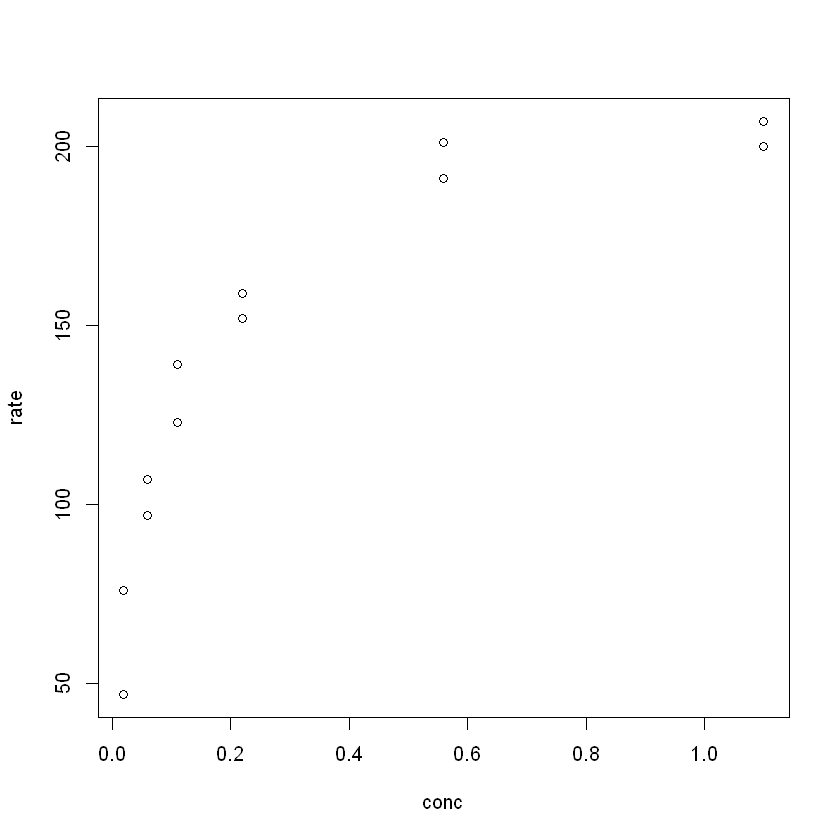

In [52]:
plot(rate~conc,data=PuroA)

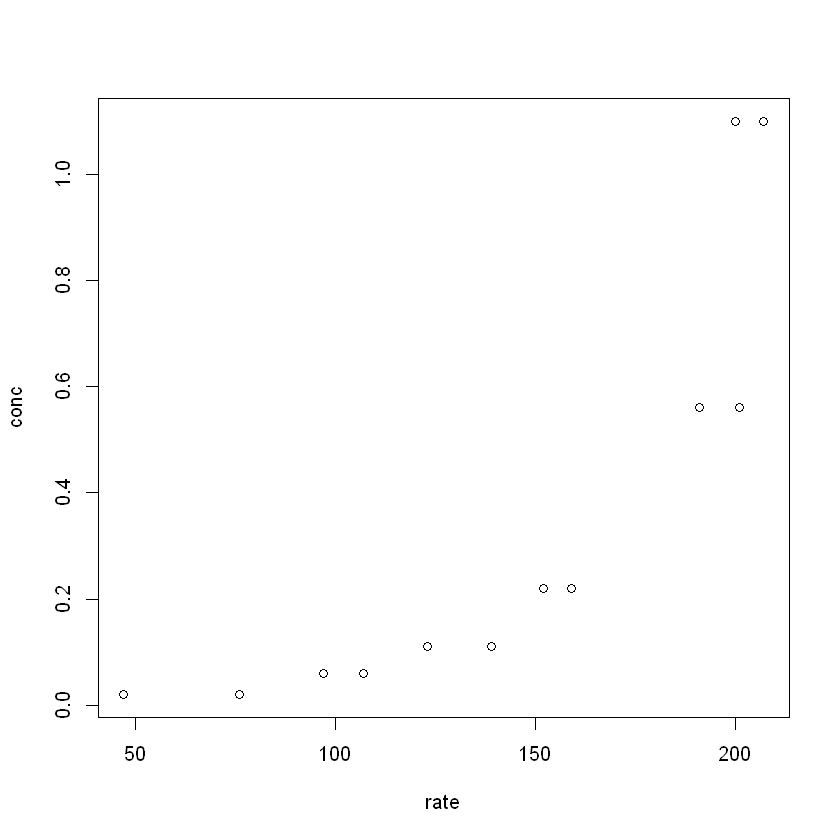

In [53]:
plot(~rate+conc,data=PuroA)



有三种方法指明函数plot()使用的数据集

    plot()函数中使用data选项

    在with()中使用plot()

    with(PuroA, plot(conc, rate))

    使用$直接指向数据与变量



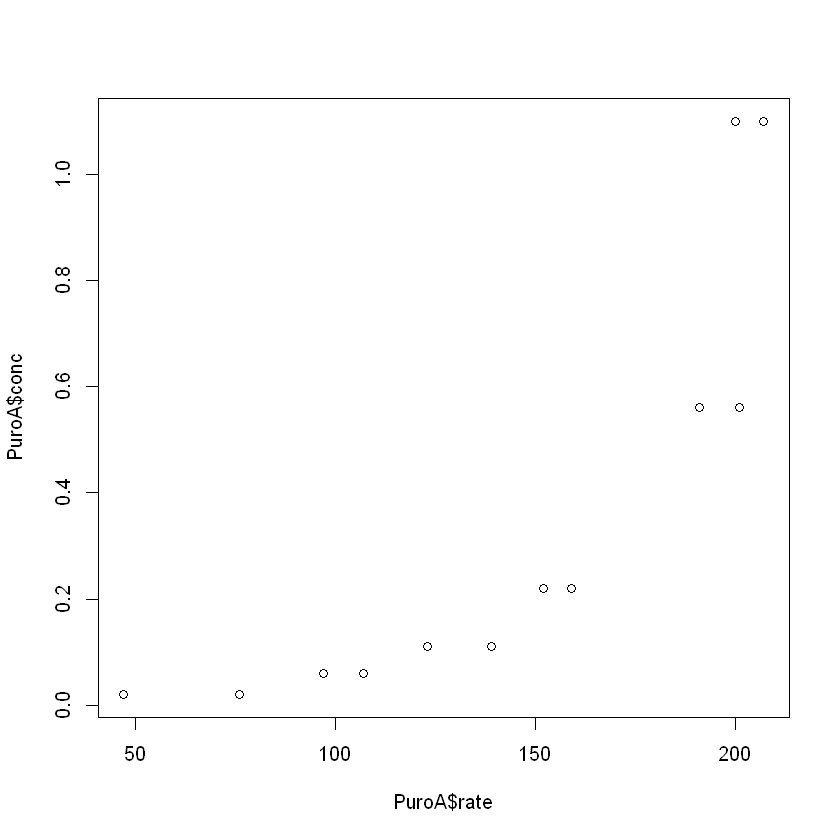

In [54]:
plot(PuroA$rate, PuroA$conc)

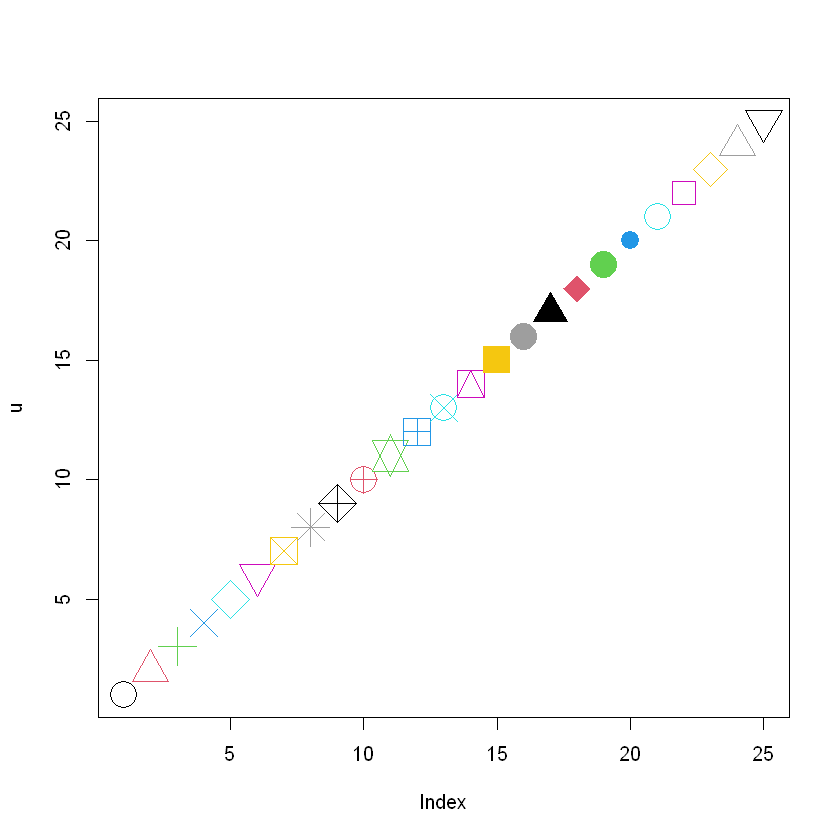

In [55]:
# 美化


# R提供25种不同的符号和8种不同颜色，浏览它们的命令是
u = 1:25
plot(u ~ 1, pch = u, col = u, cex = 3)

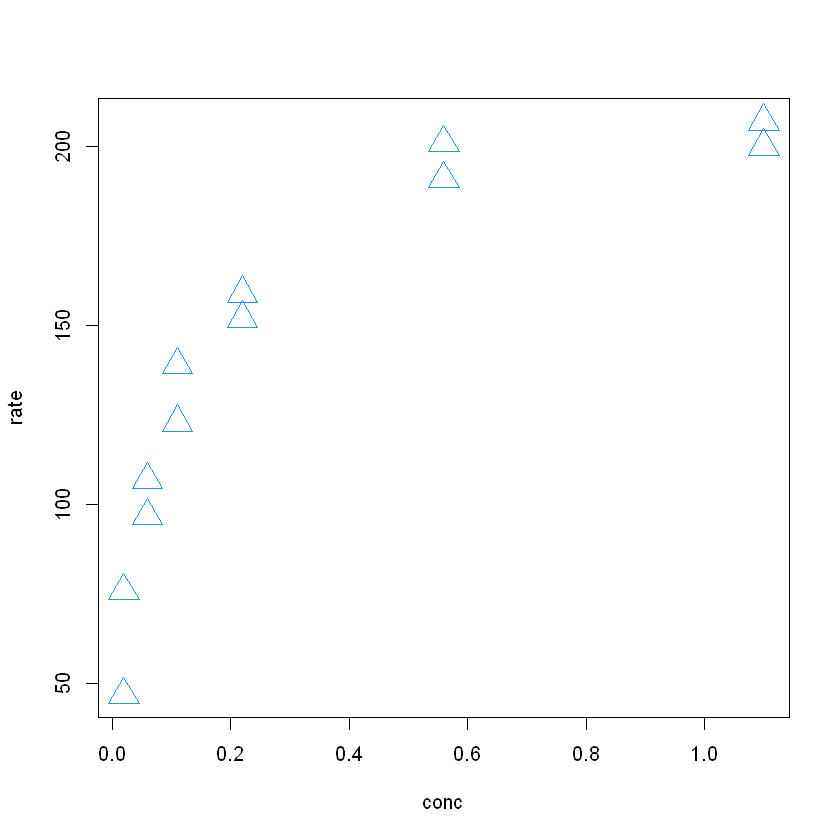

In [56]:
# 选择合适的符号及其大小与颜色
plot(rate ~ conc, data = PuroA, pch = 2, col = 4, cex = 2.5)

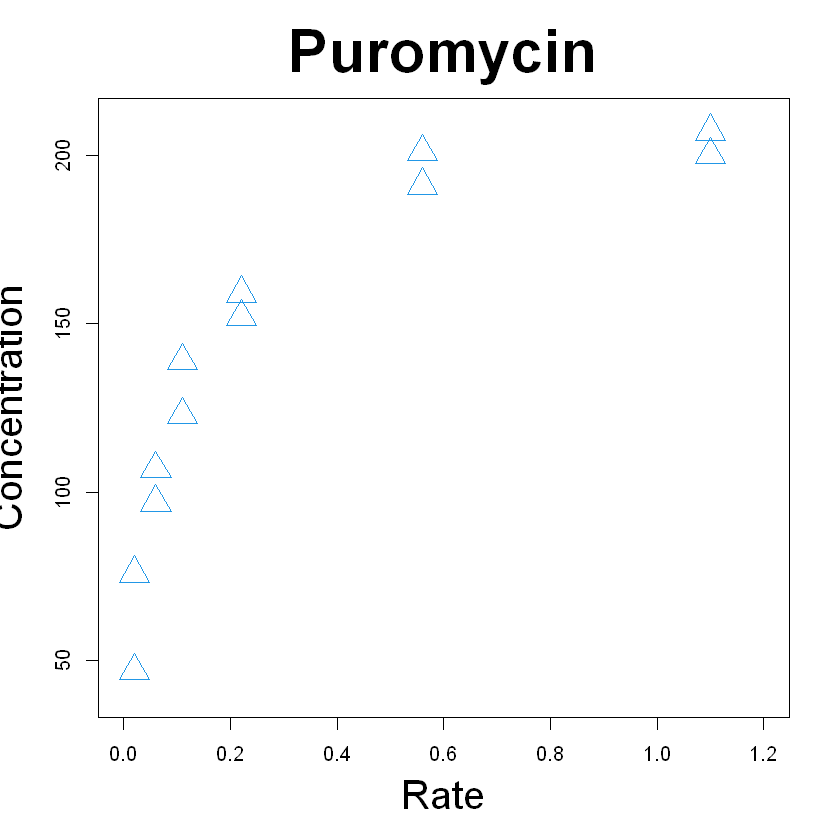

In [57]:
# 坐标轴与标题设定
plot(rate ~ conc, data = PuroA, pch = 2, col = 4,
    cex = 2.5, xlim = c(0, 1.2), ylim = c(40, 210),
    ylab = "Concentration",
    xlab = "Rate", cex.lab = 2)
title(main = "Puromycin", cex.main = 3)

In [62]:
# 连接数据点
# install.packages("doBy",repos="https://mirrors.tuna.tsinghua.edu.cn/CRAN/")
library(doBy)
PuroA.mean = summaryBy(rate ~ conc, data = PuroA, FUN = mean)
PuroA.mean

,conc,rate.mean
,<dbl>,<dbl>
1,0.02,61.5
2,0.06,102.0
3,0.11,131.0
4,0.22,155.5
5,0.56,196.0
6,1.10,203.5


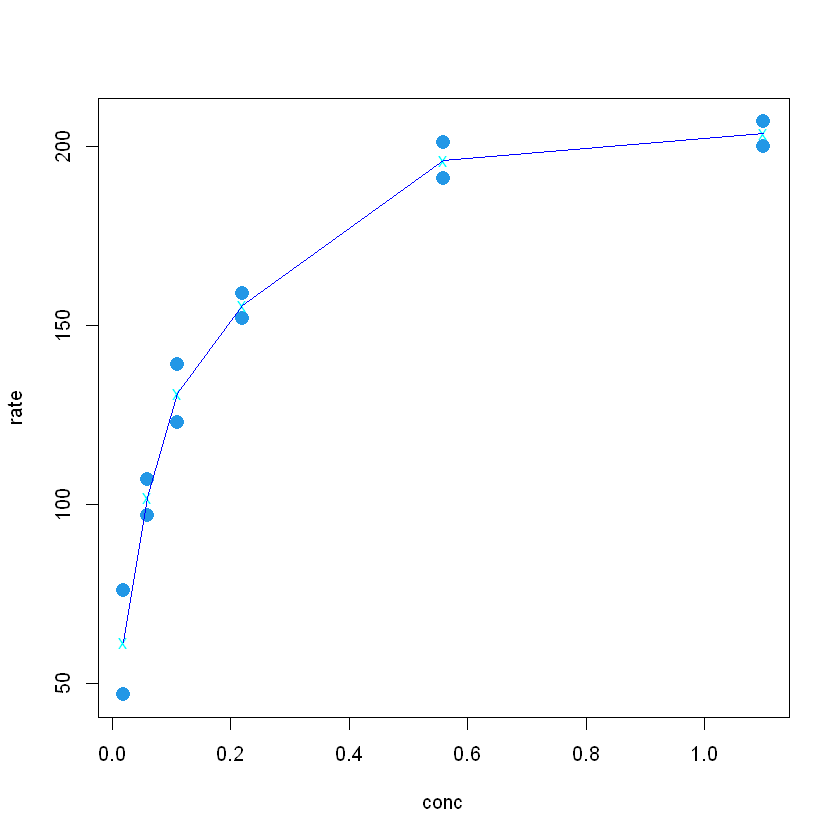

In [63]:
plot(rate ~ conc, data = PuroA, pch = 16, col = 4, cex = 1.5)
points(rate.mean  ~ conc, data = PuroA.mean, col = "cyan", lwd = 10, pch = "x")
lines(rate.mean ~ conc, data = PuroA.mean, col = "blue")

In [64]:
# 添加局部多项式拟合线。locfit()由多项式包locfit提供，其参数nn为光滑化参数，用于指明曲线的光滑程度；参数deg指明所使用的局部光滑的多项式的次数。
install.packages("locfit",repos="https://mirrors.tuna.tsinghua.edu.cn/CRAN/")

package 'locfit' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\zyy\AppData\Local\Temp\RtmpoJiXPO\downloaded_packages


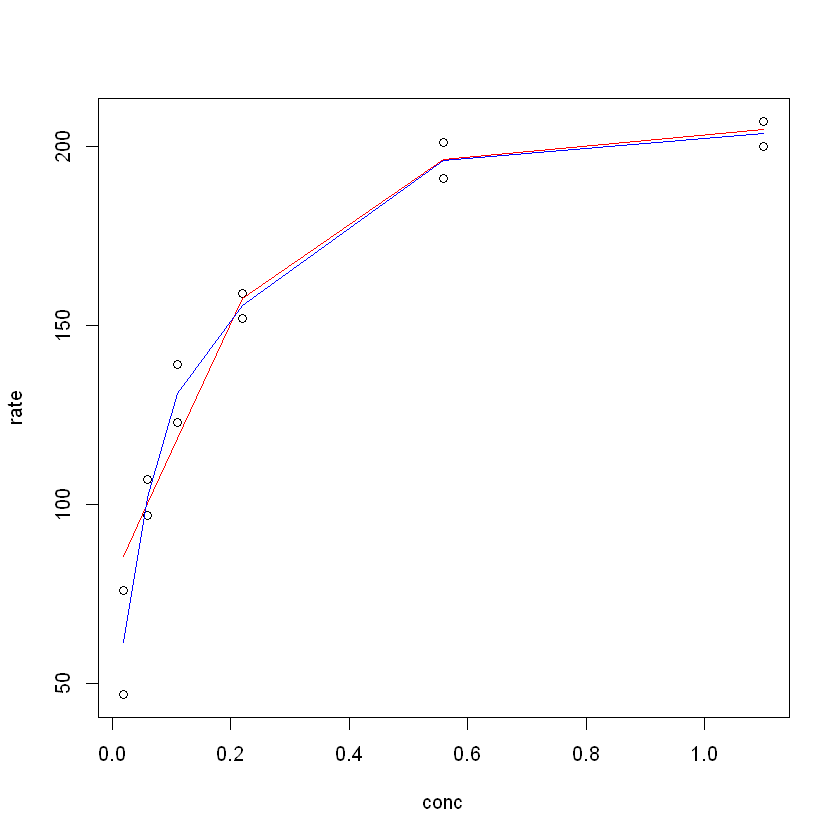

In [66]:


# 下面命令给出两条光滑曲线
plot(rate ~ conc, data = PuroA)
smooth1 = with(PuroA, lowess(rate ~ conc, f = 0.9))
smooth2 = with(PuroA, lowess(rate ~ conc, f = 0.3))
lines(smooth1, col = "red")
lines(smooth2, col = "blue")



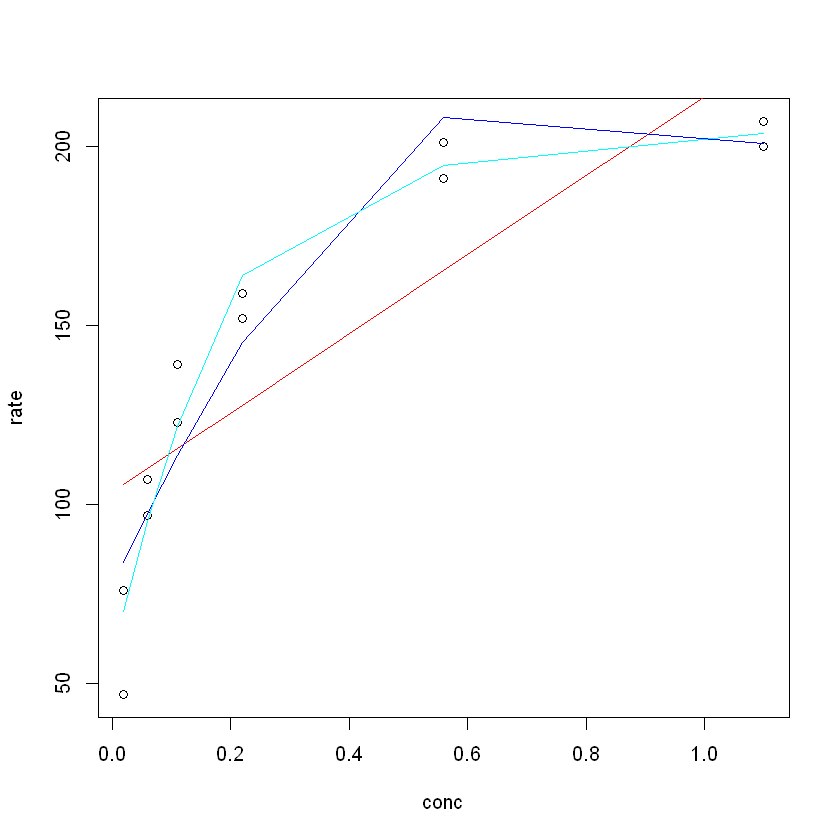

In [67]:


# 添加多项式拟合线。下面命令给出一次、二次和三次多项式拟合
plot(rate ~ conc, data = PuroA)
m1 = lm(rate ~ conc, data = PuroA)
m2 = lm(rate ~ conc + I(conc^2), data = PuroA)
m3 = lm(rate ~ conc + I(conc^2) + I(conc^3), data = PuroA)
lines(fitted(m1) ~ conc, data = PuroA, col = "red")
lines(fitted(m2) ~ conc, data = PuroA, col = "blue")
lines(fitted(m3) ~ conc, data = PuroA, col = "cyan")



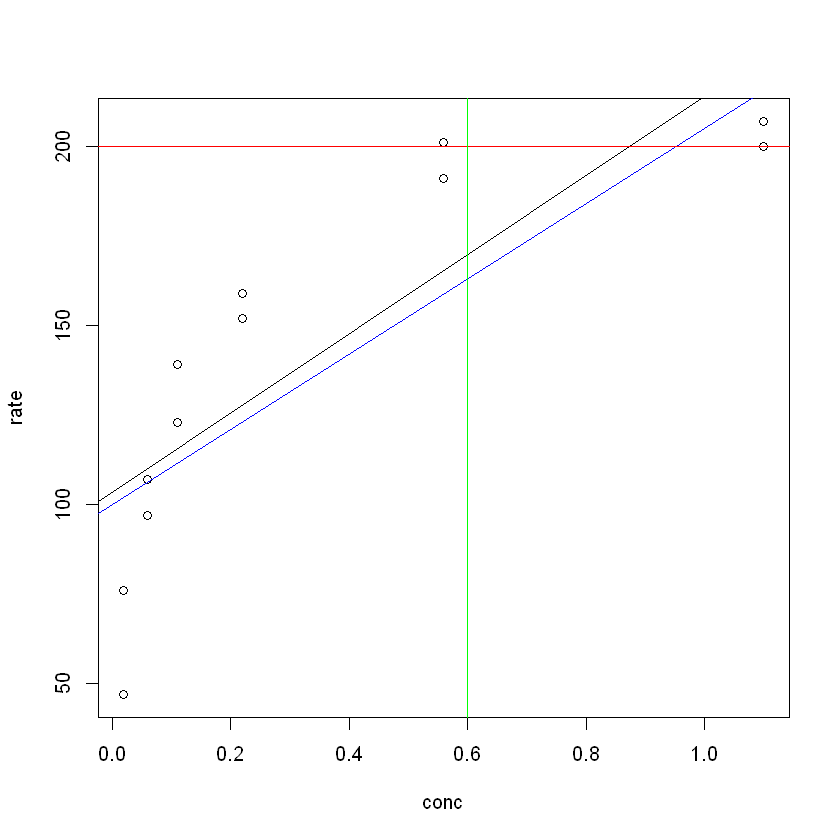

In [68]:


# 添加参考线
# 函数abline可用于产生
#         回归直线： abline(lm(...))
#         直线： abline(a,b)
#         垂直线：abline(v=a)
#         水平线： abline(h=b)

plot(rate ~ conc, data = PuroA)
abline(lm(rate ~ conc, data = PuroA))
abline(a = 100, b = 105, col = "blue")
abline(h = 200, col = "red")
abline(v = 0.6, col = "green")

In [69]:


# 两个散点图的叠加
mysymb = c(1,2)[Puromycin$state]
mysymb

[1] 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2

locfit 1.5-9.6 	 2022-07-11



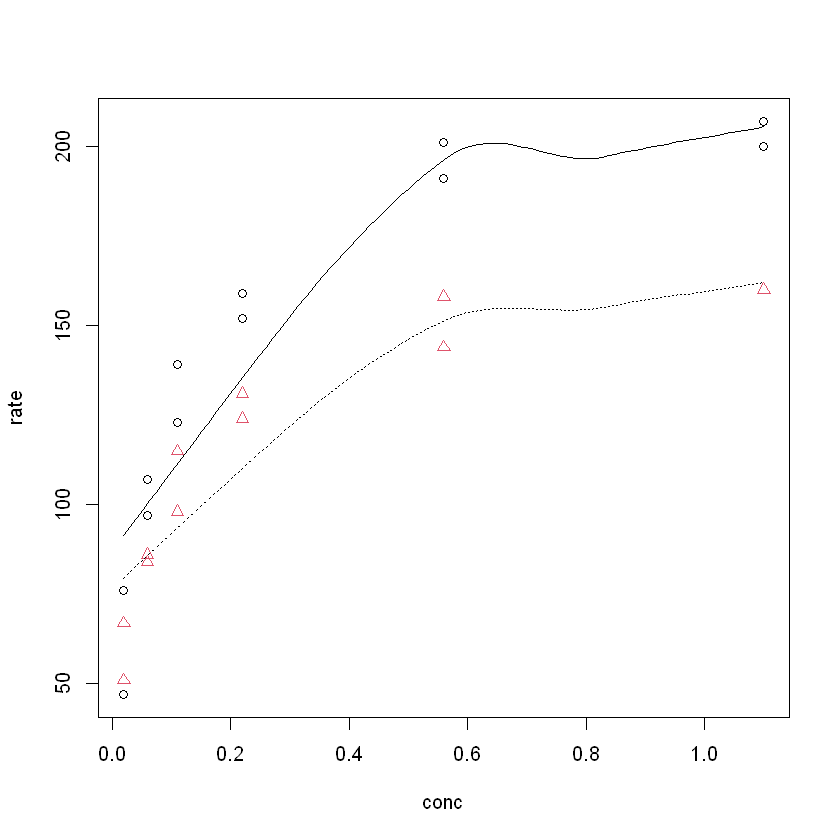

In [70]:


library(locfit)
plot(rate ~ conc, data = Puromycin, col = mysymb, pch = mysymb)
# 再对每一state在散点图上添加局部多项式光滑线
PuroB = subset(Puromycin, state == "untreated")
smoothA = locfit(rate ~ lp(conc, nn = 1, deg = 1), data = PuroA)
smoothB = locfit(rate ~ lp(conc, nn = 1, deg = 1), data = PuroB)
plot(rate ~ conc, data = Puromycin, col = mysymb, pch = mysymb)
lines(smoothA, lty = 1)
lines(smoothB, lty = 3)



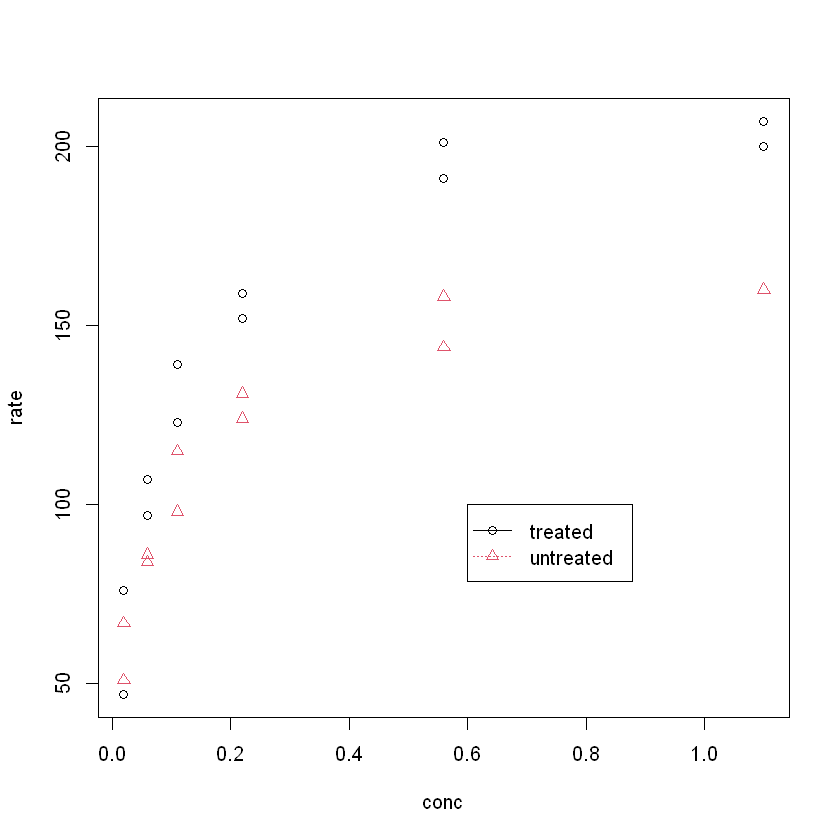

In [71]:


# 添加图例
plot(rate ~ conc, data = Puromycin,
    col = c(1,2)[state], pch = c(1,2)[state])
legend(x = 0.6, y = 100,
      legend = c("treated", "untreated"),
      col = c(1,2), pch = c(1,2), lty = c(1,3))



使用locator()函数替代legend()中的位置选项x=,y=,可通过鼠标放置图例

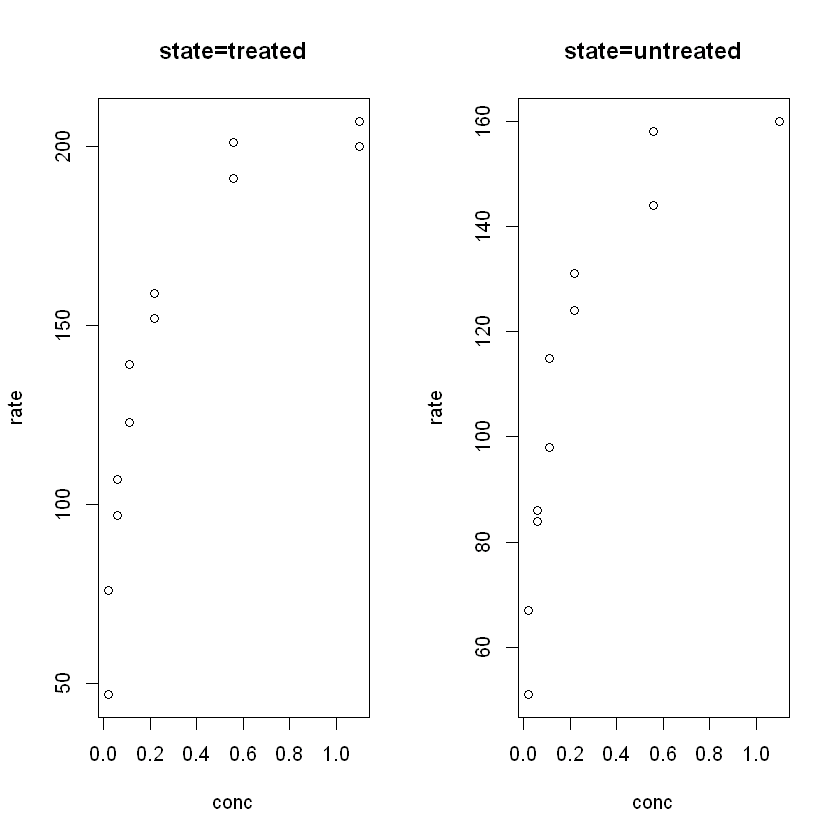

In [72]:


# 使用par()可以完成在同一个窗口中画多个图形，其格式为
# par(mfrow = c(m, n)) 它表示将当前窗口分割为m*n个窗口
# 例如：
windows(width = 5, height = 3.5)
par(mfrow = c(1,2))
plot(rate ~ conc, data = PuroA)
title("state=treated")
plot(rate ~ conc, data = PuroB)
title("state=untreated")



注意，要返回通常的区域作图，可通过命令dev.off()来将原来的图形关闭，也可以直接关闭图形窗口


# R编程
## 循环与向量化
控制结构

R有一些和C类似的控制结构

条件语句： 常用于避免除零或负数的对数等数学问题，有两种形式

    if (条件) 表达式1 else 表达式2
    ifelse(条件，yes, no)

例如：

> if(x >= 0) sqrt(x) else NA
> ifelse(x >= 0, sqrt(x), NA)

循环： 它有三种形式

    使用for：for (变量 in 变量) 表达式
    使用while： while(条件) 表达式
    使用repeat: repeat 表达式

若知道终止条件则用for语句；若无法知道运行次数使用while或repeat循环语句，repeat循环利用循环体中的break语句跳出循环


In [74]:
# 比较下面两种方法
# 1
for (i in 1:5) print(1:i)

[1] 1
[1] 1 2
[1] 1 2 3
[1] 1 2 3 4
[1] 1 2 3 4 5


In [75]:
# 2
i = 1 
while (i <= 5){
    print(1:i)
    i = i + 1
}

[1] 1
[1] 1 2
[1] 1 2 3
[1] 1 2 3 4
[1] 1 2 3 4 5


In [76]:
# 3
i = 1
repeat {
    print (1:i)
    i = i + 1
    if (i > 5) break
}

[1] 1
[1] 1 2
[1] 1 2 3
[1] 1 2 3 4
[1] 1 2 3 4 5




### 向量化

在R中，很多情况循环和控制可以通过向量化避免（简化）：向量化使得循环隐含在表达式中。

在实际的编程时，如果能将一组命令向量化，则尽量使用以避免循环，原因在于

    代码更简洁
    R是解释语言，速度慢
    在R中使用向量化会立即调用C进行运算，大大加快速度



In [77]:
# 一个例子， 如果x元素为偶数，y对应元素为0，否则为1
x = 1:10000000
y = numeric(length(x))
for (i in 1:length(x)){
    if (x[i] %% 2 ==0 )
        y[i] = 0
    else
        y[i] = 1
}
table(y)

y
      0       1 
5000000 5000000 

In [78]:
# 我们来计算上述命令使用的时间
t1 = Sys.time()
for (i in 1:length(x)){
    if (x[i] %% 2 ==0 )
        y[i] = 0
    else
        y[i] = 1
}
t2 = Sys.time()
t2 - t1 # 用时

Time difference of 1.565174 secs

In [79]:
# 使用向量化
t1 = Sys.time()
y[x%%2==0] = 0
y[x%%2!=0] = 1
t2 = Sys.time()
t2 - t1 # 用时

Time difference of 0.398535 secs